## Classification Architectures
* LeNet
* AlexNet
* VGG Models
* Inception
* ResNet Models
* DenseNet
* SE_AlexNet
* SE_Inception
* Transfer learning with Image classificaion Models

## LeNet

In [ ]:
from keras import layers
from keras.models import Model

def lenet_5(in_shape=(28,28,1), n_classes=10, opt='sgd'):
    
    in_layer = layers.Input(in_shape)
    
    conv1  = layers.Conv2D(filters=32, kernel_size=5,padding='same', activation='relu')(in_layer)
    pool1  = layers.MaxPool2D()(conv1)
    batch1 = layers.BatchNormalization() (pool1)
    
    conv2  = layers.Conv2D(filters=64, kernel_size=5,padding='same', activation='relu')(batch1)
    pool2  = layers.MaxPool2D()(conv2)
    batch2 = layers.BatchNormalization() (pool2)
    
    flatten = layers.Flatten()(batch2)
    
    dense1 = layers.Dense(120, activation='relu')(flatten)
    batch3 = layers.BatchNormalization() (dense1)
    
    dense2 = layers.Dense(84, activation='relu')(batch3)
    batch4 = layers.BatchNormalization() (dense2)
    drop1  = layers.Dropout(0.5)(batch4)
    
    preds = layers.Dense(n_classes, activation='softmax')(drop1)

    model = Model(in_layer, preds)
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model

if __name__ == '__main__':
    model = lenet_5()
    print(model.summary())

Using TensorFlow backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 64)          256 

## AlexNet

In [ ]:
from keras import layers
from keras.models import Model

def alexnet(in_shape=(227,227,3), n_classes=1000, opt='sgd'):
    in_layer = layers.Input(in_shape)
    conv1  = layers.Conv2D(96, 11, strides=4, activation='relu')(in_layer)
    pool1  = layers.MaxPool2D(3, 2)(conv1)
    batch1 = layers.BatchNormalization() (pool1)
    
    conv2  = layers.Conv2D(256, 5, strides=1, padding='same', activation='relu')(batch1)
    pool2  = layers.MaxPool2D(3, 2)(conv2)
    batch2 = layers.BatchNormalization() (pool2)
    
    conv3  = layers.Conv2D(384, 3, strides=1, padding='same', activation='relu')(batch2)
    pool3  = layers.MaxPool2D(3, 2)(conv3)
    batch3 = layers.BatchNormalization() (pool3)
    
    conv4  = layers.Conv2D(256, 3, strides=1, padding='same', activation='relu')(batch3)
    pool4  = layers.MaxPool2D(3, 2)(conv4)
    batch4 = layers.BatchNormalization() (pool4)
    
    flattened = layers.Flatten()(batch4)
    
    dense1 = layers.Dense(4096, activation='relu')(flattened)
    drop1  = layers.Dropout(0.5)(dense1)
    batch5 = layers.BatchNormalization() (drop1)
    
    dense2 = layers.Dense(4096, activation='relu')(drop1)
    drop2 = layers.Dropout(0.5)(dense2)
    batch5 = layers.BatchNormalization() (drop2)
    
    preds = layers.Dense(n_classes, activation='softmax')(batch5)

    model = Model(in_layer, preds)
    model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
    return model

if __name__ == '__main__':
    model = alexnet()
    print(model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 227, 227, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 13, 13, 256)       1024

## VGG Models (16/19)

In [ ]:
from keras import layers
from keras.models import Model, Sequential

from functools import partial

conv3 = partial(layers.Conv2D,kernel_size=3,strides=1,padding='same',activation='relu')

def block(in_tensor, filters, n_convs):
    conv_block = in_tensor
    for _ in range(n_convs):
        conv_block = conv3(filters=filters)(conv_block)
    return conv_block

def _vgg(in_shape=(227,227,3),n_classes=1000,opt='sgd',n_stages_per_blocks=[2, 2, 3, 3, 3]):
    
    in_layer = layers.Input(in_shape)
    block1 = block(in_layer, 64, n_stages_per_blocks[0])
    pool1 = layers.MaxPool2D()(block1)
    
    block2 = block(pool1, 128, n_stages_per_blocks[1])
    pool2 = layers.MaxPool2D()(block2)
    
    block3 = block(pool2, 256, n_stages_per_blocks[2])
    pool3 = layers.MaxPool2D()(block3)
    
    block4 = block(pool3, 512, n_stages_per_blocks[3])
    pool4 = layers.MaxPool2D()(block4)
    
    block5 = block(pool4, 512, n_stages_per_blocks[4])
    pool5 = layers.MaxPool2D()(block5)
    
    flattened = layers.GlobalAvgPool2D()(pool5)

    dense1 = layers.Dense(4096, activation='relu')(flattened)
    dense2 = layers.Dense(4096, activation='relu')(dense1)
    
    preds = layers.Dense(1000, activation='softmax')(dense2)

    model = Model(in_layer, preds)
    model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
    return model

def vgg16(in_shape=(227,227,3), n_classes=1000, opt='sgd'):
    return _vgg(in_shape, n_classes, opt)

def vgg19(in_shape=(227,227,3), n_classes=1000, opt='sgd'):
    return _vgg(in_shape, n_classes, opt, [2, 2, 4, 4, 4])

if __name__ == '__main__':
    model = vgg19()
    print(model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 227, 227, 3)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 227, 227, 64)      1792      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 227, 227, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 113, 113, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 113, 113, 128)     73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 113, 113, 128)     147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 128)       0   

## Inception

In [ ]:
from keras import layers
from keras.models import Model

from functools import partial

conv1x1 = partial(layers.Conv2D, kernel_size=1, activation='relu')
conv3x3 = partial(layers.Conv2D, kernel_size=3, padding='same', activation='relu')
conv5x5 = partial(layers.Conv2D, kernel_size=5, padding='same', activation='relu')

def inception_module(in_tensor, c1, c3_1, c3, c5_1, c5, pp):
    conv1 = conv1x1(c1)(in_tensor)

    conv3_1 = conv1x1(c3_1)(in_tensor)
    conv3 = conv3x3(c3)(conv3_1)

    conv5_1 = conv1x1(c5_1)(in_tensor)
    conv5 = conv5x5(c5)(conv5_1)

    pool_conv = conv1x1(pp)(in_tensor)
    pool = layers.MaxPool2D(3, strides=1, padding='same')(pool_conv)

    merged = layers.Concatenate(axis=-1)([conv1, conv3, conv5, pool])
    return merged

def aux_clf(in_tensor):
    avg_pool = layers.AvgPool2D(5, 3)(in_tensor)
    conv = conv1x1(128)(avg_pool)
    flattened = layers.Flatten()(conv)
    dense = layers.Dense(1024, activation='relu')(flattened)
    dropout = layers.Dropout(0.7)(dense)
    out = layers.Dense(1000, activation='softmax')(dropout)
    return out

def inception_net(in_shape=(224,224,3), n_classes=1000, opt='sgd'):
    in_layer = layers.Input(in_shape)

    conv1 = layers.Conv2D(64, 7, strides=2, activation='relu', padding='same')(in_layer)
    pad1 = layers.ZeroPadding2D()(conv1)
    pool1 = layers.MaxPool2D(3, 2)(pad1)
    conv2_1 = conv1x1(64)(pool1)
    conv2_2 = conv3x3(192)(conv2_1)
    pad2 = layers.ZeroPadding2D()(conv2_2)
    pool2 = layers.MaxPool2D(3, 2)(pad2)

    inception3a = inception_module(pool2, 64, 96, 128, 16, 32, 32)
    inception3b = inception_module(inception3a, 128, 128, 192, 32, 96, 64)
    pad3 = layers.ZeroPadding2D()(inception3b)
    pool3 = layers.MaxPool2D(3, 2)(pad3)

    inception4a = inception_module(pool3, 192, 96, 208, 16, 48, 64)
    inception4b = inception_module(inception4a, 160, 112, 224, 24, 64, 64)
    inception4c = inception_module(inception4b, 128, 128, 256, 24, 64, 64)
    inception4d = inception_module(inception4c, 112, 144, 288, 32, 48, 64)
    inception4e = inception_module(inception4d, 256, 160, 320, 32, 128, 128)
    pad4 = layers.ZeroPadding2D()(inception4e)
    pool4 = layers.MaxPool2D(3, 2)(pad4)

    aux_clf1 = aux_clf(inception4a)
    aux_clf2 = aux_clf(inception4d)

    inception5a = inception_module(pool4, 256, 160, 320, 32, 128, 128)
    inception5b = inception_module(inception5a, 384, 192, 384, 48, 128, 128)
    pad5 = layers.ZeroPadding2D()(inception5b)
    pool5 = layers.MaxPool2D(3, 2)(pad5)

    avg_pool = layers.GlobalAvgPool2D()(pool5)
    dropout = layers.Dropout(0.4)(avg_pool)
    preds = layers.Dense(1000, activation='softmax')(dropout)

    model = Model(in_layer, [preds, aux_clf1, aux_clf2])
    model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
    return model

if __name__ == '__main__':
    model = inception_net()
    print(model.summary())

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 112, 112, 64) 9472        input_4[0][0]                    
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 114, 114, 64) 0           conv2d_23[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_12 (MaxPooling2D) (None, 56, 56, 64)   0           zero_padding2d_1[0][0]           
____________________________________________________________________________________________

## ResNet Models

In [ ]:
from keras import layers
from keras.models import Model

def _after_conv(in_tensor):
    norm = layers.BatchNormalization()(in_tensor)
    return layers.Activation('relu')(norm)

def conv1(in_tensor, filters):
    conv = layers.Conv2D(filters, kernel_size=1, strides=1)(in_tensor)
    return _after_conv(conv)

def conv1_downsample(in_tensor, filters):
    conv = layers.Conv2D(filters, kernel_size=1, strides=2)(in_tensor)
    return _after_conv(conv)

def conv3(in_tensor, filters):
    conv = layers.Conv2D(filters, kernel_size=3, strides=1, padding='same')(in_tensor)
    return _after_conv(conv)

def conv3_downsample(in_tensor, filters):
    conv = layers.Conv2D(filters, kernel_size=3, strides=2, padding='same')(in_tensor)
    return _after_conv(conv)

def resnet_block_wo_bottlneck(in_tensor, filters, downsample=False):
    if downsample:
        conv1_rb = conv3_downsample(in_tensor, filters)
    else:
        conv1_rb = conv3(in_tensor, filters)
    conv2_rb = conv3(conv1_rb, filters)

    if downsample:
        in_tensor = conv1_downsample(in_tensor, filters)
    result = layers.Add()([conv2_rb, in_tensor])

    return layers.Activation('relu')(result)

def resnet_block_w_bottlneck(in_tensor,
                             filters,
                             downsample=False,
                             change_channels=False):
    if downsample:
        conv1_rb = conv1_downsample(in_tensor, int(filters/4))
    else:
        conv1_rb = conv1(in_tensor, int(filters/4))
    conv2_rb = conv3(conv1_rb, int(filters/4))
    conv3_rb = conv1(conv2_rb, filters)

    if downsample:
        in_tensor = conv1_downsample(in_tensor, filters)
    elif change_channels:
        in_tensor = conv1(in_tensor, filters)
    result = layers.Add()([conv3_rb, in_tensor])

    return result

def _pre_res_blocks(in_tensor):
    conv = layers.Conv2D(64, 7, strides=2, padding='same')(in_tensor)
    conv = _after_conv(conv)
    pool = layers.MaxPool2D(3, 2, padding='same')(conv)
    return pool

def _post_res_blocks(in_tensor, n_classes):
    pool = layers.GlobalAvgPool2D()(in_tensor)
    preds = layers.Dense(n_classes, activation='softmax')(pool)
    return preds

def convx_wo_bottleneck(in_tensor, filters, n_times, downsample_1=False):
    res = in_tensor
    for i in range(n_times):
        if i == 0:
            res = resnet_block_wo_bottlneck(res, filters, downsample_1)
        else:
            res = resnet_block_wo_bottlneck(res, filters)
    return res

def convx_w_bottleneck(in_tensor, filters, n_times, downsample_1=False):
    res = in_tensor
    for i in range(n_times):
        if i == 0:
            res = resnet_block_w_bottlneck(res, filters, downsample_1, not downsample_1)
        else:
            res = resnet_block_w_bottlneck(res, filters)
    return res

def _resnet(in_shape=(224,224,3),
            n_classes=1000,
            opt='sgd',
            convx=[64, 128, 256, 512],
            n_convx=[2, 2, 2, 2],
            convx_fn=convx_wo_bottleneck):
    in_layer = layers.Input(in_shape)

    downsampled = _pre_res_blocks(in_layer)

    conv2x = convx_fn(downsampled, convx[0], n_convx[0])
    conv3x = convx_fn(conv2x, convx[1], n_convx[1], True)
    conv4x = convx_fn(conv3x, convx[2], n_convx[2], True)
    conv5x = convx_fn(conv4x, convx[3], n_convx[3], True)

    preds = _post_res_blocks(conv5x, n_classes)

    model = Model(in_layer, preds)
    model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
    return model

def resnet18(in_shape=(224,224,3), n_classes=1000, opt='sgd'):
    return _resnet(in_shape, n_classes, opt)

def resnet34(in_shape=(224,224,3), n_classes=1000, opt='sgd'):
    return _resnet(in_shape,n_classes,opt,n_convx=[3, 4, 6, 3])

def resnet50(in_shape=(224,224,3), n_classes=1000, opt='sgd'):
    return _resnet(in_shape,n_classes,opt,[256, 512, 1024, 2048],[3, 4, 6, 3],convx_w_bottleneck)

def resnet101(in_shape=(224,224,3), n_classes=1000, opt='sgd'):
    return _resnet(in_shape,n_classes,opt,[256, 512, 1024, 2048],[3, 4, 23, 3],convx_w_bottleneck)

def resnet152(in_shape=(224,224,3), n_classes=1000, opt='sgd'):
    return _resnet(in_shape,n_classes,opt,[256, 512, 1024, 2048],[3, 8, 36, 3],convx_w_bottleneck)

if __name__ == '__main__':
    model = resnet50()
    print(model.summary())

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_82 (Conv2D)              (None, 112, 112, 64) 9472        input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_11 (BatchNo (None, 112, 112, 64) 256         conv2d_82[0][0]                  
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           batch_normalization_11[0][0]     
____________________________________________________________________________________________

## DenseNet

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import densenet
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
from keras import backend as K

In [ ]:
from keras.applications import densenet
def build_model():
    base_model = densenet.DenseNet121(input_shape=(300,300, 3),
                                     weights=None,
                                     include_top=False,
                                     pooling='avg')
    for layer in base_model.layers:
        layer.trainable = True

    x = base_model.output
    x = Dense(1000, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
    x = Activation('relu')(x)
    x = Dense(500, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
    x = Activation('relu')(x)
    predictions = Dense(2, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    
    return model

In [ ]:
model = build_model()
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_6 (ZeroPadding2D (None, 306, 306, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 150, 150, 64) 9408        zero_padding2d_6[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

## DenseNet1

In [ ]:
!pip install matplotlib
import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, \
    BatchNormalization, concatenate, AveragePooling2D
from keras.optimizers import Adam
import matplotlib.pyplot as plt

  Using cached https://files.pythonhosted.org/packages/a0/76/68bc3374ffa2d8d3dfd440fe94158fa8aa2628670fa38bdaf186c9af0d94/matplotlib-3.1.2-cp37-cp37m-macosx_10_9_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/df/93/8bc9b52a8846be2b9572aa0a7c881930939b06e4abe1162da6a0430b794f/kiwisolver-1.1.0-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
     |████████████████████████████████| 71kB 8.8kB/s eta 0:00:01


In [ ]:
def conv_layer(conv_x, filters):
    conv_x = BatchNormalization()(conv_x)
    conv_x = Activation('relu')(conv_x)
    conv_x = Conv2D(filters, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(conv_x)
    conv_x = Dropout(0.2)(conv_x)

    return conv_x

In [ ]:
def dense_block(block_x, filters, growth_rate, layers_in_block):
    for i in range(layers_in_block):
        each_layer = conv_layer(block_x, growth_rate)
        block_x = concatenate([block_x, each_layer], axis=-1)
        filters += growth_rate

    return block_x, filters

In [ ]:
def transition_block(trans_x, tran_filters):
    trans_x = BatchNormalization()(trans_x)
    trans_x = Activation('relu')(trans_x)
    trans_x = Conv2D(tran_filters, (1, 1), kernel_initializer='he_uniform', padding='same', use_bias=False)(trans_x)
    trans_x = AveragePooling2D((2, 2), strides=(2, 2))(trans_x)

    return trans_x, tran_filters

In [ ]:
def dense_net(filters, growth_rate, classes, dense_block_size, layers_in_block):
    input_img = Input(shape=(28, 28, 1))
    x = Conv2D(24, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(input_img)

    dense_x = BatchNormalization()(x)
    dense_x = Activation('relu')(x)

    dense_x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(dense_x)
    for block in range(dense_block_size - 1):
        dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
        dense_x, filters = transition_block(dense_x, filters)

    dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
    dense_x = BatchNormalization()(dense_x)
    dense_x = Activation('relu')(dense_x)
    dense_x = GlobalAveragePooling2D()(dense_x)

    output = Dense(classes, activation='softmax')(dense_x)

    return Model(input_img, output)

In [ ]:
dense_block_size = 3
layers_in_block = 4

growth_rate = 12
classes = 10

In [ ]:
model = dense_net(growth_rate * 2, growth_rate, classes, dense_block_size, layers_in_block)
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_135 (Conv2D)             (None, 28, 28, 24)   216         input_7[0][0]                    
__________________________________________________________________________________________________
activation_56 (Activation)      (None, 28, 28, 24)   0           conv2d_135[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_27 (MaxPooling2D) (None, 14, 14, 24)   0           activation_56[0][0]              
____________________________________________________________________________________________

In [ ]:
!pip install pydot
from keras.utils import plot_model
plot_model(model,show_shapes=True)

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

channels = 1
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 16s 1us/step


In [ ]:
images = X_train.reshape(-1, 28, 28, 1).astype('float64')
images_means = []
images_stds = []
for i in range(channels):
    mean = np.mean(images[:, :, :, i])
    std = np.std(images[:, :, :, i])
    images_means.append(mean)
    images_stds.append(std)

In [ ]:
for i in range(channels):
    images[:, :, :, i] = ((images[:, :, :, i] - images_means[i]) / images_stds[i])

labels = to_categorical(Y_train)

images_test = X_test.reshape(-1, 28, 28, 1).astype('float64')

In [ ]:
images_test_means = []
images_test_stds = []
for i in range(channels):
    mean = np.mean(images_test[:, :, :, i])
    std = np.std(images_test[:, :, :, i])
    images_test_means.append(mean)
    images_test_stds.append(std)

In [ ]:
for i in range(channels):
    images_test[:, :, :, i] = ((images_test[:, :, :, i] - images_test_means[i]) / images_test_stds[i])

labels_test = Y_test

In [ ]:
batch_size = 256
epochs = 10
optimizer = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(images,labels, epochs=epochs, batch_size=batch_size, shuffle=True)

Epoch 1/10
38656/60000 [==================>...........] - ETA: 1:37 - loss: 0.2000 - accuracy: 0.9434

In [ ]:
label_pred = model.predict(images_test)

pred = []
for i in range(len(label_pred)):
    pred.append(np.argmax(label_pred[i]))

count = 0
for i in range(len(pred)):
    if pred[i] == labels_test[i]:
        count += 1

print('Accuracy in test set is: ', count / 100)

Accuracy in test set is:  98.72


## Resources
####  https://github.com/titu1994/keras-squeeze-excite-network/blob/master/se_inception_resnet_v2.py
#### https://github.com/arthurdouillard/keras-squeeze_and_excitation_network/blob/master/se_alexnet.py

## Squeez and Excitation Network (SE_AlexNet)

In [ ]:
from keras.layers import GlobalAveragePooling2D, Multiply, Dense
from keras import backend as K

def SqueezeExcite(x, ratio=16, name=''):
    nb_chan = K.int_shape(x)[-1]

    y = GlobalAveragePooling2D(name='{}_se_avg'.format(name))(x)
    y = Dense(nb_chan // ratio, activation='relu', name='{}_se_dense1'.format(name))(y)
    y = Dense(nb_chan, activation='sigmoid', name='{}_se_dense2'.format(name))(y)

    y = Multiply(name='{}_se_mul'.format(name))([x, y])
    return y

In [ ]:
from keras.models import Model
from keras.layers import Conv2D, Input, Dense, Flatten, MaxPool2D
from keras.layers import Activation, BatchNormalization

def alexnet_block(x, filters, kernel_size, se, name):
    y = Conv2D(filters, kernel_size, padding='same', name='{}_conv'.format(name))(x)
    if se:
        y = SqueezeExcite(y, ratio=16, name=name)
    y = BatchNormalization(name='{}_bn'.format(name))(y)
    y = Activation('relu', name='{}_act'.format(name))(y)
    y = MaxPool2D(pool_size=(2, 2), padding='same', name='{}_pool'.format(name))(y)
    return y

In [ ]:
def dense_block(x, size, name, bn=True):
    y = Dense(size, name='{}_dense'.format(name))(x)
    if bn:
        y = BatchNormalization(name='{}_bn'.format(name))(y)
    y = Activation('relu', name='{}_act'.format(name))(y)
    return y

In [ ]:
def SeAlexNet(nb_class, input_shape=(28,28,1), include_top=True, weights=None,
              batch_norm=True, se=True):
    """AlexNet without the splitted stream."""

    img_input = Input(shape=input_shape)

    x = alexnet_block(img_input, 64, (11, 11), se=se, name='block1')

    params = [
        (128, (7, 7)),
        (192, (3, 3)),
        (256, (3, 3))
    ]

    for i, (filters, kernel_size) in enumerate(params, start=2):
        x = alexnet_block(x, filters, kernel_size, se=se, name='block{}'.format(i))

    if include_top:
        x = Flatten(name='flatten')(x)
        x = dense_block(x, 4096, 'top1', bn=batch_norm)
        x = dense_block(x, 4096, 'top2', bn=batch_norm)
        x = Dense(nb_class, activation='softmax')(x)

    model = Model(inputs=img_input, outputs=x)
    
    return model

In [ ]:
model = SeAlexNet(10)
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
block1_conv (Conv2D)            (None, 28, 28, 64)   7808        input_2[0][0]                    
__________________________________________________________________________________________________
block1_se_avg (GlobalAveragePoo (None, 64)           0           block1_conv[0][0]                
__________________________________________________________________________________________________
block1_se_dense1 (Dense)        (None, 4)            260         block1_se_avg[0][0]              
____________________________________________________________________________________________

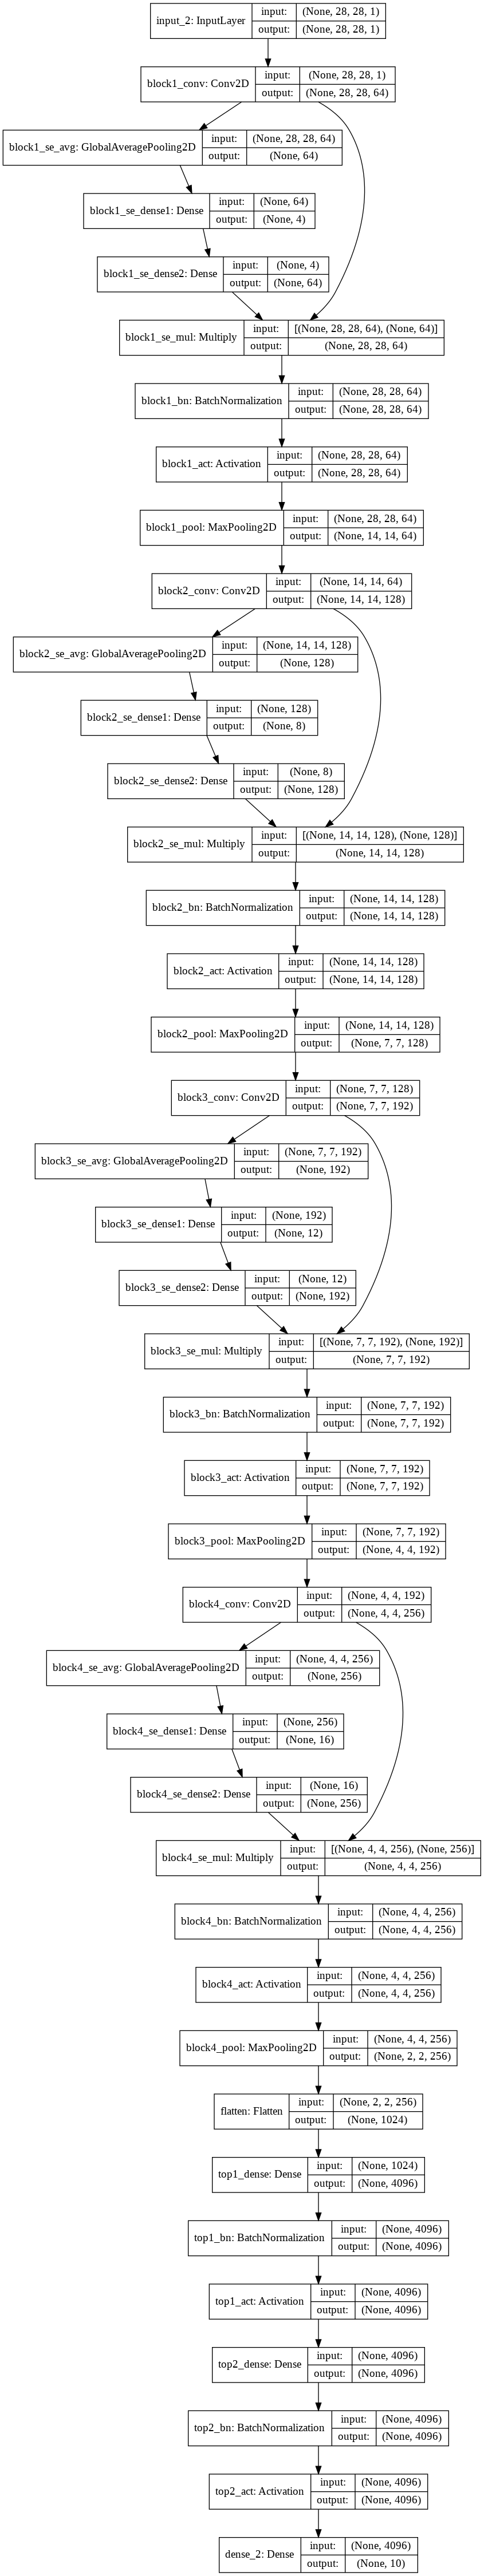

In [ ]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

## SE_Inception
####  https://github.com/ShobhitLamba/Squeeze-And-Excitation-Network/blob/master/se_inception_resnet_v1.py

In [ ]:
from keras.layers import Input, add
from keras.layers.merge import concatenate
from keras.layers import Dense, Dropout, Lambda, Flatten, Activation, Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model

In [ ]:
from keras.layers import GlobalAveragePooling2D, Reshape, Dense, multiply

def squeeze_excite_block(input, ratio = 16):
    init = input
    channel_axis = -1 # Since we are using Tensorflow
    filters = init._keras_shape[channel_axis]
    shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(shape)(se)
    se = Dense(filters // ratio, activation = "relu", kernel_initializer = "he_normal", use_bias = False)(se)
    se = Dense(filters, activation = "sigmoid", kernel_initializer = "he_normal", use_bias = False)(se)

    output = multiply([init, se])
    
    return output

In [ ]:
def se_resnet_v1_stem(input):
    '''The stem of the Inception-ResNet-v1 network.'''
    
    # Input shape is 299 * 299 * 3 (Tensorflow dimension ordering)
    x = Conv2D(32, (3, 3), activation = "relu", strides = (2, 2), padding = "same")(input) # 149 * 149 * 32
    x = Conv2D(32, (3, 3), activation = "relu", padding = "same")(x) # 147 * 147 * 32
    x = Conv2D(64, (3, 3), activation = "relu", padding = "same")(x) # 147 * 147 * 64
    
    x = MaxPooling2D((3, 3), strides = (2, 2), padding = "same")(x) # 73 * 73 * 64
    
    x = Conv2D(80, (1, 1), activation = "relu", padding = "same")(x) # 73 * 73 * 80
    x = Conv2D(192, (3, 3), activation = "relu", padding = "same")(x) # 71 * 71 * 192
    x = Conv2D(256, (3, 3), activation = "relu", strides = (2, 2), padding = "same")(x) # 35 * 35 * 256
    
    x = BatchNormalization(axis = -1)(x)
    x = Activation("relu")(x)
    
    return x

In [ ]:
def se_inception_resnet_v1_A(input, scale_residual = True):
    '''Architecture of Inception_ResNet_A block which is a 35 * 35 grid module.'''
        
    ar1 = Conv2D(32, (1, 1), activation = "relu", padding = "same")(input)
    
    ar2 = Conv2D(32, (1, 1), activation = "relu", padding = "same")(input)
    ar2 = Conv2D(32, (3, 3), activation = "relu", padding = "same")(ar2)
    
    ar3 = Conv2D(32, (1, 1), activation = "relu", padding = "same")(input)
    ar3 = Conv2D(32, (3, 3), activation = "relu", padding = "same")(ar3)
    ar3 = Conv2D(32, (3, 3), activation = "relu", padding = "same")(ar3)
    
    merged = concatenate([ar1, ar2, ar3], axis = -1)
    
    # squeeze and excite block
    merged = squeeze_excite_block(merged)
    
    ar = Conv2D(256, (1, 1), activation = "linear", padding = "same")(merged)
    if scale_residual: ar = Lambda(lambda a: a * 0.1)(ar)
    
    output = add([input, ar])
    output = BatchNormalization(axis = -1)(output)
    output = Activation("relu")(output)
    
    return output

In [ ]:
def se_inception_resnet_v1_B(input, scale_residual = True):
    '''Architecture of Inception_ResNet_B block which is a 17 * 17 grid module.'''
    
    br1 = Conv2D(128, (1, 1), activation = "relu", padding = "same")(input)
    
    br2 = Conv2D(128, (1, 1), activation = "relu", padding = "same")(input)
    br2 = Conv2D(128, (1, 7), activation = "relu", padding = "same")(br2)
    br2 = Conv2D(128, (7, 1), activation = "relu", padding = "same")(br2)
    
    merged = concatenate([br1, br2], axis = -1)
        
    # squeeze and excite block
    merged = squeeze_excite_block(merged)
    
    br = Conv2D(896, (1, 1), activation = "linear", padding = "same")(merged)
    if scale_residual: br = Lambda(lambda b: b * 0.1)(br)
    
    output = add([input, br])
    output = BatchNormalization(axis = -1)(output)
    output = Activation("relu")(output)
    
    return output

In [ ]:
def se_inception_resnet_v1_C(input, scale_residual = True):
    '''Architecture of Inception_ResNet_C block which is a 8 * 8 grid module.'''
    
    cr1 = Conv2D(192, (1, 1), activation = "relu", padding = "same")(input)
    
    cr2 = Conv2D(192, (1, 1), activation = "relu", padding = "same")(input)
    cr2 = Conv2D(192, (1, 3), activation = "relu", padding = "same")(cr2)
    cr2 = Conv2D(192, (3, 1), activation = "relu", padding = "same")(cr2)
    
    merged = concatenate([cr1, cr2], axis = -1)
        
    # squeeze and excite block
    merged = squeeze_excite_block(merged)
    
    cr = Conv2D(1792, (1, 1), activation = "linear", padding = "same")(merged)
    if scale_residual: cr = Lambda(lambda c: c * 0.1)(cr)
    
    output = add([input, cr])
    output = BatchNormalization(axis = -1)(output)
    output = Activation("relu")(output)
    
    return output

In [ ]:
def se_reduction_resnet_A(input, k = 192, l = 224, m = 256, n = 384):
    '''Architecture of a 35 * 35 to 17 * 17 Reduction_ResNet_A block. It is used by both v1 and v2 Inception-ResNets.'''
    init = Input((256,256,1))
    rar1 = MaxPooling2D((3,3), strides = (2,2))(input)

    rar2 = Conv2D(n, (3, 3), activation = "relu", strides = (2,2))(input)

    rar3 = Conv2D(k, (1, 1), activation = "relu", padding = "same")(input)
    rar3 = Conv2D(l, (3, 3), activation = "relu", padding = "same")(rar3)
    rar3 = Conv2D(m, (3, 3), activation = "relu", strides = (2,2))(rar3)

    merged = concatenate([rar1, rar2, rar3], axis = -1)
        
    # squeeze and excite block
    merged = squeeze_excite_block(merged)
    
    rar = BatchNormalization(axis = -1)(merged)
    rar = Activation("relu")(rar)
    
    return rar

In [ ]:
def se_reduction_resnet_v1_B(input):
    '''Architecture of a 17 * 17 to 8 * 8 Reduction_ResNet_B block.'''
    
    rbr1 = MaxPooling2D((3,3), strides = (2,2), padding = "valid")(input)
    
    rbr2 = Conv2D(256, (1, 1), activation = "relu", padding = "same")(input)
    rbr2 = Conv2D(384, (3, 3), activation = "relu", strides = (2,2))(rbr2)
    
    rbr3 = Conv2D(256, (1, 1), activation = "relu", padding = "same")(input)
    rbr3 = Conv2D(256, (3, 3), activation = "relu", strides = (2,2))(rbr3)
    
    rbr4 = Conv2D(256, (1, 1), activation = "relu", padding = "same")(input)
    rbr4 = Conv2D(256, (3, 3), activation = "relu", padding = "same")(rbr4)
    rbr4 = Conv2D(256, (3, 3), activation = "relu", strides = (2,2))(rbr4)
    
    merged = concatenate([rbr1, rbr2, rbr3, rbr4], axis = -1)
        
    # squeeze and excite block
    merged = squeeze_excite_block(merged)
    
    rbr = BatchNormalization(axis = -1)(merged)
    rbr = Activation("relu")(rbr)
    
    return rbr

In [ ]:
def se_inception_resnet_v1(nb_classes = 10, scale = True):
    '''Creates the Inception_ResNet_v1 network.'''
    
    init = Input((299,299, 1))  # Channels last, as using Tensorflow backend with Tensorflow image dimension ordering
    
    # Input shape is 299 * 299 * 3
    x = se_resnet_v1_stem(init) # Output: 35 * 35 * 256
    
     # 5 x Inception A
    for i in range(5):
        x = se_inception_resnet_v1_A(x, scale_residual = scale)
        # Output: 35 * 35 * 256
        
    # Reduction A
    x = se_reduction_resnet_A(x, k = 192, l = 192, m = 256, n = 384) # Output: 17 * 17 * 896

    # 10 x Inception B
    for i in range(10):
        x = se_inception_resnet_v1_B(x, scale_residual = scale)
        # Output: 17 * 17 * 896
        
    # Reduction B
    x = se_reduction_resnet_v1_B(x) # Output: 8 * 8 * 1792

    # 5 x Inception C
    for i in range(5):
        x = se_inception_resnet_v1_C(x, scale_residual = scale) 
        # Output: 8 * 8 * 1792
        
    # Average Pooling
    x = AveragePooling2D((8, 8))(x) # Output: 1792

    # Dropout
    x = Dropout(0.2)(x) # Keep dropout 0.2 as mentioned in the paper
    x = Flatten()(x) # Output: 1792

    # Output layer
    output = Dense(units = nb_classes, activation = "softmax")(x) # Output: 10000

    model = Model(init, output, name = "SE-Inception-ResNet-v1")   
        
    return model

In [ ]:
if __name__ == "__main__":
    se_inception_resnet_v1 = se_inception_resnet_v1()
    se_inception_resnet_v1.summary()


Model: "SE-Inception-ResNet-v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 299, 299, 1)  0                                            
__________________________________________________________________________________________________
conv2d_143 (Conv2D)             (None, 150, 150, 32) 320         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_144 (Conv2D)             (None, 150, 150, 32) 9248        conv2d_143[0][0]                 
__________________________________________________________________________________________________
conv2d_145 (Conv2D)             (None, 150, 150, 64) 18496       conv2d_144[0][0]                 
_____________________________________________________________________________

In [ ]:
from keras.utils import plot_model
plot_model(se_inception_resnet_v1,show_shapes=True)

## Keras Image classificaion Models
* Xception
* VGG 19
* VGG 16
* ResNet 50
* ResNet 101
* ResNet 152
* ResNet 50 V2
* ResNet 101 V2
* ResNet 152 V2
* ResNeXt 50
* ResNeXt 101
* Inception V3
* InceptionResNet V2
* MobileNet 
* MobileNet V2
* DenseNet 121
* DenseNet 169
* DenseNet 201
* NASNET Mobile
* NASNET Large

In [ ]:
from keras.applications.resnet50 import ResNet50
res= ResNet50(include_top=False, weights=None, input_shape=(240,240,1))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [ ]:
x1=res.output
x2=GlobalAveragePooling2D()(x1)
x3=Dropout(0.3)(x2)
out=Dense(10,activation='softmax')(x3)

In [ ]:
res_model=Model(inputs=res.input,outputs=out) ### define keras' functional model
res_model.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 240, 240, 1)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 246, 246, 1)  0           input_17[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 120, 120, 64) 3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 120, 120, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [ ]:
#from keras.utils import plot_model
#plot_model(res_model,show_shapes=True)

## DenseNet

In [ ]:
from keras.applications.densenet import DenseNet121
dense= DenseNet121(include_top=False, weights=None, input_shape=(240,240,1))

In [ ]:
x1=dense.output
x2=GlobalAveragePooling2D()(x1)
x3=Dropout(0.3)(x2)
out=Dense(10,activation='softmax')(x3)

In [ ]:
dense_model=Model(inputs=dense.input,outputs=out) ### define keras' functional model
dense_model.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 240, 240, 1)  0                                            
__________________________________________________________________________________________________
zero_padding2d_8 (ZeroPadding2D (None, 246, 246, 1)  0           input_19[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 120, 120, 64) 3136        zero_padding2d_8[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 120, 120, 64) 256         conv1/conv[0][0]                 
___________________________________________________________________________________________